In [1]:
#importing the libraries needed for the project

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar

# Read the 12 monthly transactions and combine them all into one single file

In [2]:
#saving each file into a dataframe

jan = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_January_2019.csv')
feb = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_February_2019.csv')
mar = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_March_2019.csv')
apr = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')
may = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_May_2019.csv')
jun = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_June_2019.csv')
jul = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_July_2019.csv')
aug = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_August_2019.csv')
sep = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_September_2019.csv')
oct = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_October_2019.csv')
nov = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_November_2019.csv')
dec = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_December_2019.csv')

#merging all dataframe into a single dataframe

sales_data_2019 = pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec])

#displaying the first 5 rows in the dataframe
sales_data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [3]:
#displaying the rows and column information of the dataframe
sales_data_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


# Cleaning the data

In [4]:
#checking for null values

sales_data_2019.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
#displaying the null values

sales_data_2019[sales_data_2019.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# we will have to drop the null values since they are relatively small (null values=545,non null values=186,305)

sales_data_2019 = sales_data_2019.dropna()
sales_data_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [7]:
#double checking for duplicates
sales_data_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [15]:
#noticed that the headings were being duplicated

#sales_data_2019['Order Date'].sort_values()

sales_data_2019[sales_data_2019['Month']=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [16]:
#we drop the duplucated headings

sales_data_2019 = sales_data_2019[sales_data_2019['Month'] != 'Or']
sales_data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [17]:
#extracting the month from the order date column

sales_data_2019['Month'] = sales_data_2019['Order Date'].str[0:2]

sales_data_2019['Month'] = sales_data_2019['Month'].astype('int32')

<ipython-input-17-575295a2952a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2019['Month'] = sales_data_2019['Order Date'].str[0:2]
<ipython-input-17-575295a2952a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2019['Month'] = sales_data_2019['Month'].astype('int32')


In [18]:
#checking the data type

sales_data_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [19]:
#converting the int num for month to a calendar month

sales_data_2019['Month'] = sales_data_2019['Month'].apply(lambda x: calendar.month_abbr[x])

<ipython-input-19-bd9636e78254>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2019['Month'] = sales_data_2019['Month'].apply(lambda x: calendar.month_abbr[x])


In [20]:
sales_data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan


# Adding a sales column

In [21]:
#converting Quantity Ordered to an integer

sales_data_2019['Quantity Ordered'] = sales_data_2019['Quantity Ordered'].astype('int32')

<ipython-input-21-48288e29268c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2019['Quantity Ordered'] = sales_data_2019['Quantity Ordered'].astype('int32')


In [22]:
#converting the price to float

sales_data_2019['Price Each'] = sales_data_2019['Price Each'].astype('float')

<ipython-input-22-e44f390d5bb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2019['Price Each'] = sales_data_2019['Price Each'].astype('float')


In [23]:
#calculating and creating a new column for sales 

sales_data_2019['Sales'] = sales_data_2019['Quantity Ordered']*sales_data_2019['Price Each']
sales_data_2019.head()

<ipython-input-23-6ece54ffb629>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2019['Sales'] = sales_data_2019['Quantity Ordered']*sales_data_2019['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99


# Finding the best month for sales and the total amount for that month

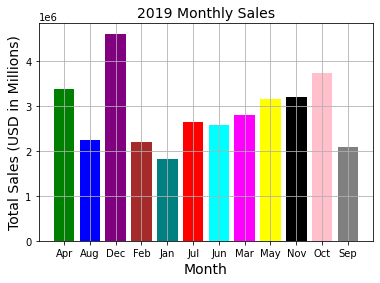

In [24]:
#plotting a bar chart showing the total monthly sales for year 2019

_months = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct','Sep']

_sales = sales_data_2019.groupby('Month').sum()

New_Colors = ['green','blue','purple','brown','teal','red','cyan','magenta','yellow','black','pink','grey']

plt.bar(_months, _sales['Sales'], color=New_Colors)
plt.title('2019 Monthly Sales', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales (USD in Millions)', fontsize=14)
plt.grid(True)

In [25]:
#gettin the sum of Sales for the month of Dec

Dec = sales_data_2019[sales_data_2019['Month']=='Dec']
Dec['Sales'].sum()

4613443.339999999

#### What city had the highest number of sales

In [41]:
#creating a new column 'City' from Purchase Address column

sales_data_2019['City'] = sales_data_2019['Purchase Address'].apply(lambda x:x.split(",")[1] + ' ' + x.split(",")[2].split(' ')[1])

<ipython-input-41-ea8f7b8ecafa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2019['City'] = sales_data_2019['Purchase Address'].apply(lambda x:x.split(",")[1] + ' ' + x.split(",")[2].split(' ')[1])


In [42]:
# displaying all the cities in the data

sales_data_2019['City'].unique()

array([' Boston MA', ' Portland OR', ' San Francisco CA',
       ' Los Angeles CA', ' Austin TX', ' Atlanta GA', ' Seattle WA',
       ' New York City NY', ' Dallas TX', ' Portland ME'], dtype=object)

In [43]:
# summing the Yearly sales of each city

sales_data_2019.groupby('City').sum()

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta GA,16602,2.779908e+06,2.795499e+06
Austin TX,11153,1.809874e+06,1.819582e+06
Boston MA,22528,3.637410e+06,3.661642e+06
Dallas TX,16730,2.752628e+06,2.767975e+06
Los Angeles CA,33289,5.421435e+06,5.452571e+06
New York City NY,27932,4.635371e+06,4.664317e+06
Portland ME,2750,4.471893e+05,4.497583e+05
Portland OR,11303,1.860558e+06,1.870732e+06
San Francisco CA,50239,8.211462e+06,8.262204e+06


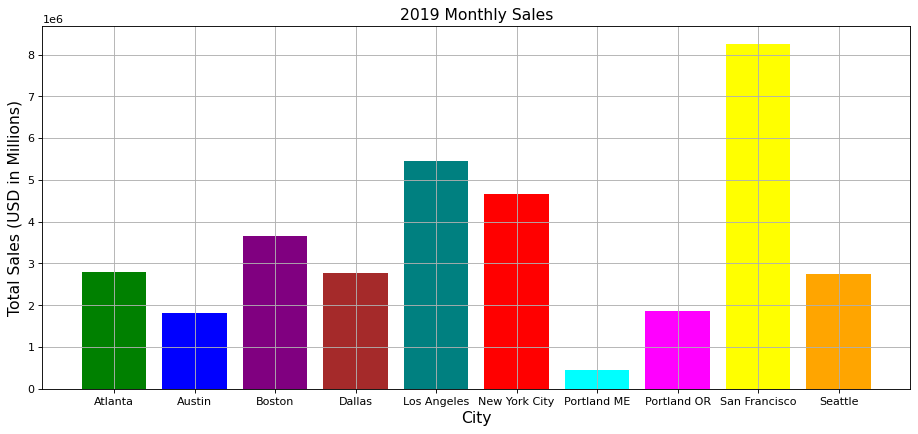

In [63]:
#plotting a bar chart showing year 2019 total sales for each city

_City = ['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland ME', 'Portland OR', 
         'San Francisco', 'Seattle']

_salesByCity = sales_data_2019.groupby('City').sum()

New_Colors = ['green','blue','purple','brown','teal','red','cyan','magenta','yellow','orange']

plt.figure(figsize=(14, 6), dpi=80)
plt.bar(_City, _salesByCity['Sales'], color=New_Colors)
plt.title('2019 Monthly Sales', fontsize=14)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Sales (USD in Millions)', fontsize=14)
plt.grid(True)

### What time should we display advertisements to maximise likelihood of customer's buying product?

In [45]:
sales_data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin TX


In [52]:
#creating a new column 'Hour of the day' from order date

sales_data_2019['Hour of the day'] = sales_data_2019['Order Date'].apply(lambda x:x.split(' ')[1].split(':')[0])

sales_data_2019['Hour of the day'] = sales_data_2019['Hour of the day'].astype('int32')

<ipython-input-52-aafb0468e7ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2019['Hour of the day'] = sales_data_2019['Order Date'].apply(lambda x:x.split(' ')[1].split(':')[0])
<ipython-input-52-aafb0468e7ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2019['Hour of the day'] = sales_data_2019['Hour of the day'].astype('int32')


In [47]:
sales_data_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour of the day
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston MA,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland OR,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco CA,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles CA,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin TX,11


In [53]:
sales_data_2019[c].value_counts()

19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Hour of the day, dtype: int64

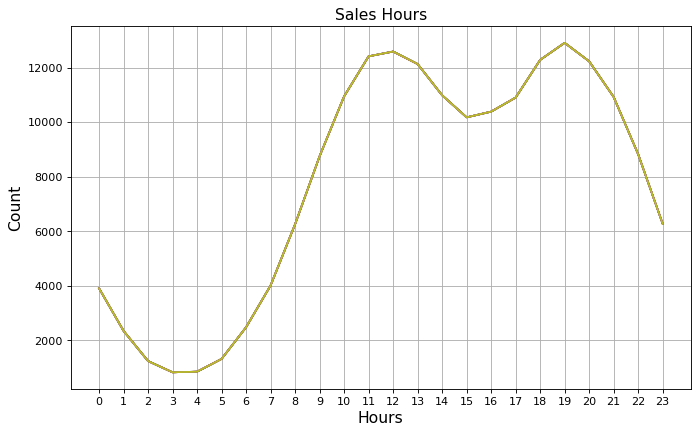

In [61]:
# plotting a line graph to show the frequency of sales per hour of the day

hours = [hour for hour, df in sales_data_2019.groupby(['Hour of the day'])]


plt.figure(figsize=(10, 6), dpi=80)
plt.plot(hours, sales_data_2019.groupby(['Hour of the day']).count())
plt.xticks(hours)
plt.title('Sales Hours', fontsize=14)
plt.xlabel('Hours', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)